# First-Cut Run 68 $\gamma$ and Neutron Direct Backgrounds

My notebook N-MISC-18-003 shows (pgs 49 and 51) simulations that were started to assess the direct gamma and neutron backgrounds for a Pu/Be source running in the K100 Run 68 setup. Specifically testing out the .h5 files created using the scripts mentioned on pg 52 of the above notebook reference. 

In [1]:
#play around with some hits data stored in h5 file
#===============to suppress h5py warning see:
#https://github.com/h5py/h5py/issues/961
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import h5py
warnings.resetwarnings()
f = h5py.File("/data/chocula/villaa/k100Sim_Data/captureCalhdf5/Run68_gdirect_bknd_R68_PuBe_0x0005_1549439935.h5","r")

for i in f:
    print(i)

hits = f['geant4/hits']

geant4


In [2]:
import numpy as np
print(np.shape(hits))
print(hits[0,:])

(1838004, 22)
[ 8.20000000e+01  1.00000000e+03  1.00118000e+05  0.00000000e+00
  2.11200000e+03  3.00721013e-08  0.00000000e+00  6.60568498e-03
  5.19294799e-03 -7.57669727e-03 -2.64559290e+02 -3.98541790e+02
  6.19032837e+02  3.48247508e+06  6.44645682e-03  1.65848813e-03
  3.49313911e-03 -2.79400000e+02 -4.02359879e+02  6.10991107e+02
  3.47526002e+06  0.00000000e+00]


In [3]:
#try to label events with consecutive and unique labels
ev = hits[:,0]

diffs = np.append(np.diff(ev),1)
diff_divide = np.copy(diffs)
diff_divide[diff_divide==0] = 1 #replace some elements with unity
diffs = diffs/diff_divide
#print(diffs[0:300])
#print(diff_divide[0:300])

newev = np.cumsum(diffs)
print(newev[0:300])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8. 9. 9. 9.
 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]


In [4]:
#select the poly block
cPoly = np.zeros(np.shape(hits)[0],dtype=bool)


cPoly[(hits[:,1]==1000) & (hits[:,6]==0) & (hits[:,4]==2112)] = True
print(np.sum(cPoly))
print(np.shape(cPoly))
print(np.shape(hits))

769238
(1838004,)
(1838004, 22)


In [5]:
#reminder of file structure
#EV  DT  TS  P Type  E1  D3  PX3 PY3 PZ3 X3  Y3  Z3  time3 PX1 PY1 PZ1 X1  Y1  Z1  time1 nCap
#python index below
#0    1   2 3   4     5   6   7   8   9  10  11  12    13   14  15  16 17  18  19   20    21

In [6]:
#I want to find the edges in Y because those are the places the poly surfaces that I'm interested in are.
#I can do that by a histogram

#first some cuts
cZeroEdep = np.zeros(np.shape(hits)[0],dtype=bool)
cNeutron = np.zeros(np.shape(hits)[0],dtype=bool)
cGamma = np.zeros(np.shape(hits)[0],dtype=bool)

cZeroEdep[hits[:,6]==0] = True
cNeutron[hits[:,4]==2112] = True
cGamma[hits[:,4]==22] = True

finalypos = hits[:,11]
finalypos = finalypos[cZeroEdep & cNeutron & cPoly]/1000 # get things in meters instead of mm
print(np.shape(finalypos))

(771657,)


In [7]:
ymax = 1
n,nx = np.histogram(finalypos,1000,range=(-ymax,+ymax))

xc = (nx[:-1] + nx[1:]) / 2

In [8]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

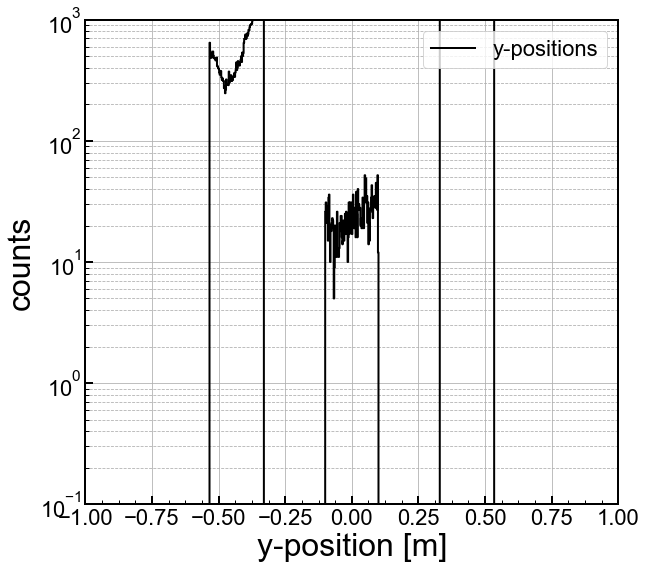

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


ax1.step(xc,n, where='mid',color='k', linestyle='-', \
         label='y-positions', linewidth=2)



#tlabel = 'Thresh. {0} eV$_{{\mathrm{{ee}}}}$'.format(18)
#ax1.axvline(thresh, color='k', linestyle='--', lw=2, alpha=0.8,label=tlabel)
#erange_x = np.arange(thresh-sigthr, thresh+sigthr, 0.01)
#ax1.fill_between(erange_x, ymin, ymax, facecolor='r', alpha=0.3)

ax1.set_yscale('log')
ax1.set_xlim(-ymax, ymax) #in pairs
ax1.set_ylim(0.1,1e3)
ax1.set_xlabel('y-position [m]',**axis_font)
ax1.set_ylabel('counts',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()